This is a notebook with an example of the simulations carried out in https://arxiv.org/abs/2312.17146. We will use the Hydrogen molecule for this example.

In [46]:
#import libraries
import tequila as tq
import numpy as np
import pickle
from matplotlib import pyplot as plt
import cirq
import scipy
import k_commute

In [47]:
k = 2

In [48]:
#initialize a list of bond-lengths we will consider here
equilibrium_bl = 0.741
bond_lengths = [0.601, 0.741, 0.881]
bond_lengths.extend([i*0.5 for i in range(1,9)])
bond_lengths.sort()

print("We are considering the following configurations:", bond_lengths)

We are considering the following configurations: [0.5, 0.601, 0.741, 0.881, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [49]:
#get Hamiltonian and commuting groups for a molecular configuration. The diagonalizing circuits are now generated using k-commutativity

Hamiltonians = []
Graph_circuits = [] # Previously retrieved from .pickle containing tq circuits

for bond in bond_lengths:
    file = open("../Hamiltonians/H2/H2_Hamiltonian_for_bond_length_{0}.pickle".format(bond),'rb')
    mol_Ham = pickle.load(file)
    file.close()
              
    Hamiltonians.append(mol_Ham)

    file = open("../groups_and_circuits/H2/H2_groups_and_circuits_for_bond_length_{0}.pickle".format(bond),'rb')
    groups, circuits = pickle.load(file)
    file.close()
    
    Graph_circuits.append(circuits)

groups_and_circuits = []
just_groups = []
k_circuits = []
for hamiltonian in Hamiltonians:
    groups, circuits = k_commute.diag_circ_from_ham(hamiltonian.to_openfermion(), k=k)
    #print(circuits)
    #tqcircuits = []
        
    just_groups.append(groups)
    groups_and_circuits.append(zip(groups,circuits))
    k_circuits.append(circuits)

Hams_groups_circs = zip(Hamiltonians,groups_and_circuits)


strings:  ['+_Z', '+Z_', '+ZZ', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
strings:  ['+_Z', '+Z_', '+ZZ', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
strings:  ['+_Z', '+_Z', '+ZZ', '+Z_', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
strings:  ['+_Z', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+ZZ', '+Z_', '+Z_']
strings:  ['+_Z', '+Z_', '+ZZ', '+ZZ', '+Z_', '+Z_', '+ZZ']
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
strings:  ['+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+ZZ', '+_Z', '+Z_

In [50]:
from cirq.contrib.qasm_import import circuit_from_qasm


In [51]:
all_tq_diags = []
for circ_list in k_circuits:
    tq_circuits = []
    for circuit in circ_list:
        qasm_circuit = circuit.to_qasm()
        tq_circuits.append(tq.import_open_qasm(qasm_circuit))
    all_tq_diags.append(tq_circuits)

Things to try: 
- stim tableau on pauli
- unitary conjugation on pauli
- other things on my notebook

In [52]:
#let's calculate the ground state energies of the molecule at the different configurations
FCI_eners = []

for Ham in Hamiltonians:
    v,vv = np.linalg.eigh(Ham.to_matrix())
    FCI_eners.append(v[0])
    
print("The exact ground state energies of the molecules are:", FCI_eners)

The exact ground state energies of the molecules are: [-1.0551597946880173, -1.1166462657704586, -1.1372744055258712, -1.1237206708647083, -1.1011503301329568, -0.9981493533579184, -0.9486411121296494, -0.9360549199436622, -0.9336318445559841, -0.9332284055492808, -0.9331713618435846]


In [53]:
processed_hams=[]
for hamiltonian in Hamiltonians:
    ham = hamiltonian.to_openfermion()
    groups, circuits = k_commute.diag_circ_from_ham(ham,4)
    pham = k_commute.preprocess_hamiltonian(ham,drop_term_if=[lambda term: term == ()])
    processed_hams.append(pham)


strings:  ['+__Z_', '+_ZZZ', '+Z___', '+ZZ__', '+_Z_Z', '+_Z__', '+ZZZZ', '+ZZZ_', '+Z_Z_', '+Z_ZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+__Z_', '+_ZZZ', '+Z___', '+ZZ__', '+_Z_Z', '+_Z__', '+ZZZZ', '+ZZZ_', '+Z_Z_', '+Z_ZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+__Z_', '+_ZZZ', '+_Z_Z', '+ZZ__', '+Z___', '+_Z__', '+ZZZZ', '+ZZZ_', '+Z_Z_', '+Z_ZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+_Z_Z', '+__Z_', '+_ZZZ', '+_Z__', '+ZZZZ', '+ZZZ_', '+Z___', '+ZZ__', '+Z_Z_', '+Z_ZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+_Z_Z', '+_Z__', '+ZZZZ', '+ZZZ_', '+Z___', '+ZZ__', '+__Z_', '+_ZZZ', '+Z_Z_', '+Z_ZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+_Z_Z', '+ZZZZ', '+ZZZ_', '+_Z__', '+Z___', '+ZZ__', '+Z_Z_', '+Z_ZZ', '+__Z_', '+_ZZZ']
strings:  ['+YZYZ', '+XZX_', '+XZXZ', '+YZY_']
strings:  ['+_Z_Z', '+ZZZZ', '+ZZZ_', '+_Z__', '+ZZ__', '+Z___', '+Z_Z_', '+Z_ZZ', '+__Z_', '+_ZZZ']
strings:  [

In [54]:
group_of_groups = []
for pham in processed_hams:
    pauli_groups = k_commute.get_si_sets(pham,k)
    group_of_groups.append(pauli_groups)

pauli_groups[0]
output_by_groups=[]
qubits = pham.qubits
for pauli_groups in group_of_groups:
    output = []
    for group in pauli_groups:
        #print(group)
        blocked_stim_strings = k_commute.convert_to_stim_strings(group, k, qubits)
        all_depths, all_circuits = k_commute.compute_measurement_circuit_depth(blocked_stim_strings)
        print(len(all_circuits))
        output.append(all_circuits)
    output_by_groups.append((pauli_groups,output))


strings:  ['+_Z', '+Z_', '+ZZ', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
2
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
2
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
2
strings:  ['+_Z', '+Z_', '+ZZ', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
2
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
2
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
2
strings:  ['+_Z', '+_Z', '+ZZ', '+Z_', '+_Z', '+ZZ', '+ZZ', '+Z_', '+Z_']
strings:  ['+Z_', '+ZZ', '+_Z', '+ZZ', '+Z_', '+Z_', '+ZZ']
2
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
2
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
2
strings:  ['+_Z', '+_Z', '+_Z', '+ZZ', '+ZZ', '+Z_', '+ZZ', '+Z_', '+Z_']
strings:  ['+_Z', '+Z_', '+ZZ', '+ZZ', '+Z_', '+Z_', '+ZZ']
2
strings:  ['+YZ', '+YZ']
strings:  ['+YZ', '+Y_']
2
strings:  ['+XZ', '+XZ']
strings:  ['+X_', '+XZ']
2
strings:  ['+_Z', '+_Z', '+ZZ', '+ZZ', '

In [55]:
output_by_groups[7]

([[(0.12551494704729324+0j)*Z(q(1))*Z(q(3)),
   (0.12327877587794817+0j)*Z(q(0))*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.12327877587794817+0j)*Z(q(0))*Z(q(1))*Z(q(2)),
   (0.12142002464866115+0j)*Z(q(1)),
   (0.052726264372406934+0j)*Z(q(0))*Z(q(2)),
   (0.052726264372406934+0j)*Z(q(0))*Z(q(2))*Z(q(3)),
   (0.05264858071129595+0j)*Z(q(0))*Z(q(1)),
   (0.052648580711295925+0j)*Z(q(0)),
   (0.02551388133905072+0j)*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.025513881339050692+0j)*Z(q(2))],
  [(0.07055251150554122+0j)*Y(q(0))*Z(q(1))*Y(q(2))*Z(q(3)),
   (0.07055251150554122+0j)*Y(q(0))*Z(q(1))*Y(q(2))],
  [(0.07055251150554122+0j)*X(q(0))*Z(q(1))*X(q(2)),
   (0.07055251150554122+0j)*X(q(0))*Z(q(1))*X(q(2))*Z(q(3))]],
 [[0: ───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.25,x=-0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───
                                │                              │
1: ───PhXZ(a=0,x=0.25,z=0)──────@───PhXZ(a=0.5,x=0.5,z=0)──────@───PhXZ(a=0.5,x=0.5,z=0.75)──────,
   0: ───PhXZ(a=0.25,x=0.5,z=5.55

In [56]:
tq.draw(tq.import_open_qasm(circuits[1].to_qasm()))

0: ────────────────────────────────────────@───S^-1───X^0.5───Z───X^-0.5───S───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                           │
1: ───Z^0───X^0.5───S^-1───X^-0.5───Z^0────@───Z^0────X^0.5───S───X^-0.5───Z^0───@───S────────X^0.5───Z^0───X^-0.5───S─────────────────────────────────────────────────────────────────────────────────────
                                                                                 │
2: ───Z^0───X^0.5───S──────X^-0.5───Z^0──────────────────────────────────────────@───Z^0.75───X^0.5───S─────X^-0.5───Z───@───Z^0───X^0.5───S───X^-0.5───Z^0────@───Z──────X^0.5───S────────X^-0.5───T──────
                                                                                                                         │                                     │
3: ───T─────X^0.5───S──────X^-0.5───T^-1───────────────────────────────────────────────────────────

''

In [57]:
#Calculating HF energies
num_qubits = 4

HF_ener = []
for Ham in Hamiltonians:
    #simulating reference state-prep circuit (in BK basis)
    ref = tq.QCircuit()    
    ref += tq.gates.X(0)
    
    Exp = tq.ExpectationValue(U=ref, H= Ham)
    energy = tq.simulate(Exp, backend="qulacs")
    #print(energy)
    HF_ener.append(energy)
    
    
print("Hartree-Fock energy:", HF_ener)

Hartree-Fock energy: [-1.0429962747511712, -1.1014552070447619, -1.1167061372172085, -1.0961661385920694, -1.0661086491853156, -0.9108735543822686, -0.7837926540830397, -0.7029435995786047, -0.6560482510473122, -0.6298201100573617, -0.6148699739991873]


In [58]:
g_seed = 1

def random_number(num_param):
    """
    This function calls the numpy.random.randn function with
    a new seed every time, and returns the values
    """
    global g_seed
    rand_state = np.random.RandomState(seed = g_seed)
    g_seed += int(np.abs(np.random.randn(1)[0]*10) + 1)
    return rand_state.randn(num_param)

In [61]:
#Now we construct the H-GSA ansatz and carry optimization
hgsa_results = []
mean_vqe_eners = []
std_vqe_eners = []

mean_vqe_errors = []
vqe_errors_min = []
vqe_errors_max = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, Graph_circuits)):
    if index != -1:
        #construct the CCA
        HGSA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        HGSA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[1:]):
        
            #Add the Clifford circuit
            HGSA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                
                HGSA += tq.gates.Rz(var_1, qubit)                
                HGSA += tq.gates.Ry(var_2, qubit)
                HGSA += tq.gates.Rz(var_3, qubit)                
                HGSA += tq.gates.Ry(-1*var_2, qubit)
                HGSA += tq.gates.Rz(-1*var_1, qubit)
            
            #Add the Clifford circuit inverse
            HGSA += cir
        
        energies = []
        errors = []
        num_samples = 5
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in HGSA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            
            #print(initial_values)
            Exp = tq.ExpectationValue(U=HGSA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = initial_values, tol= 1e-6, method="bfgs" ,backend="qulacs", silent="True")
            hgsa_results.append(result)
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners.append(np.mean(energies))
        std_vqe_eners.append(np.std(energies))
        
        mean_vqe_errors.append(np.mean(errors))
        vqe_errors_min.append(np.min(errors))
        vqe_errors_max.append(np.max(errors))
            
    
print("Energy from VQE with HGSA:", mean_vqe_eners)

Energy from VQE with HGSA: [-1.055159794687357, -1.1166462657699545, -1.1372744055253028, -1.1237206708637628, -1.1011503301300596, -0.9981493533551962, -0.9486411121268308, -0.9360549199430135, -0.933631844555919, -0.9332284055487445, -0.9331713618431113]


In [62]:
#repeat of HGSA code, now with K-commutativity diagonalizing circuits instead
mean_vqe_eners2 = []
std_vqe_eners2 = []
all_results = []
mean_vqe_errors2 = []
vqe_errors_min2 = []
vqe_errors_max2 = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, all_tq_diags)): 
    if index != -1:
        #construct the CCA
        KA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        KA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[:]):
            #print(i)
            #print('the circuit is ', cir)
            #Add the Clifford circuit
            KA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                #print('the vars', var_1, var_2, var_3)
                KA += tq.gates.Rz(var_1, qubit)                
                KA += tq.gates.Ry(var_2, qubit)
                KA += tq.gates.Rz(var_3, qubit)                
                KA += tq.gates.Ry(-1*var_2, qubit)
                KA += tq.gates.Rz(-1*var_1, qubit)
                #print('circuit after vars', KA)
            
            #Add the Clifford circuit inverse
            KA += cir
        
        #print('before optimization:', KA)
        #tq.draw(KA)
    
        energies = []
        errors = []
        num_samples = 1
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in KA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            #print(initial_values)
            
            Exp = tq.ExpectationValue(U=KA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = hgsa_results[index].angles, tol= 1e-6, method="bfgs" ,backend="qulacs", silent="True")
            all_results.append(result)
            #print('after opt:', KA)
            #tq.draw(KA)
    
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners2.append(np.mean(energies))
        std_vqe_eners2.append(np.std(energies))
        
        mean_vqe_errors2.append(np.mean(errors))
        vqe_errors_min2.append(np.min(errors))
        vqe_errors_max2.append(np.max(errors))
        
    
print("Energy from VQE with K-Commutativity Ansatz:", mean_vqe_eners2)

Energy from VQE with K-Commutativity Ansatz: [-1.0429962747471335, -1.1014552070439017, -1.1167061372170817, -1.0961661385920556, -1.0661086491838416, -0.9108735543791251, -0.9245373192258057, -0.931639086734628, -0.9329364933050239, -0.9331357763681402, -0.9331608267602072]


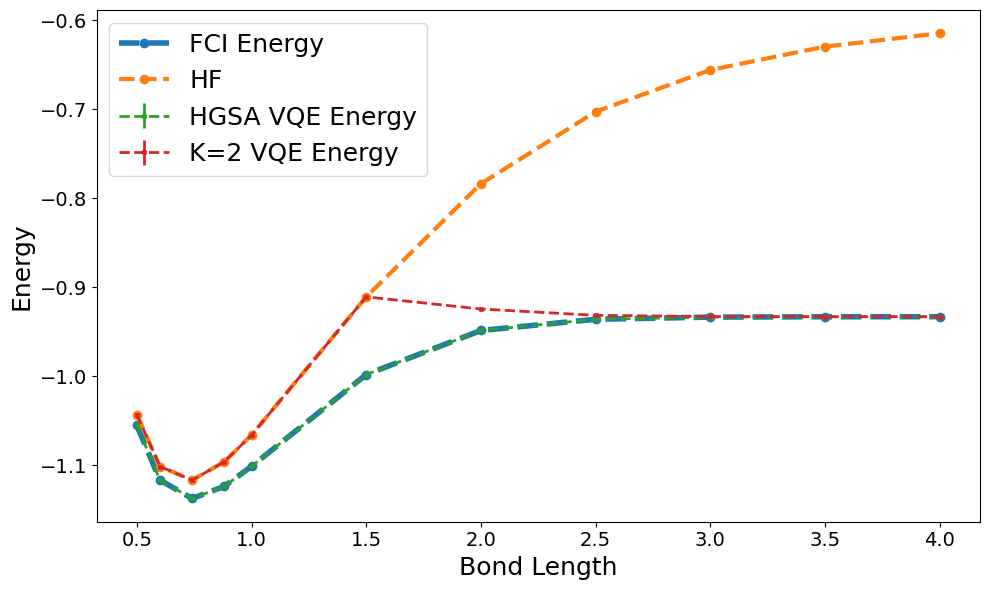

In [63]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.plot(bond_lengths, FCI_eners, marker="o", markersize=6, linestyle="--", linewidth=4, label="FCI Energy")
plt.plot(bond_lengths, HF_ener, marker="o", markersize=6, linestyle="--", linewidth=3, label="HF")
plt.errorbar(bond_lengths, mean_vqe_eners, std_vqe_eners, marker="X", markersize=3, linestyle="--", linewidth=2, label="HGSA VQE Energy")
plt.errorbar(bond_lengths, mean_vqe_eners2, std_vqe_eners2, marker="X", markersize=3, linestyle="--", linewidth=2, label=f"K={k} VQE Energy")
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

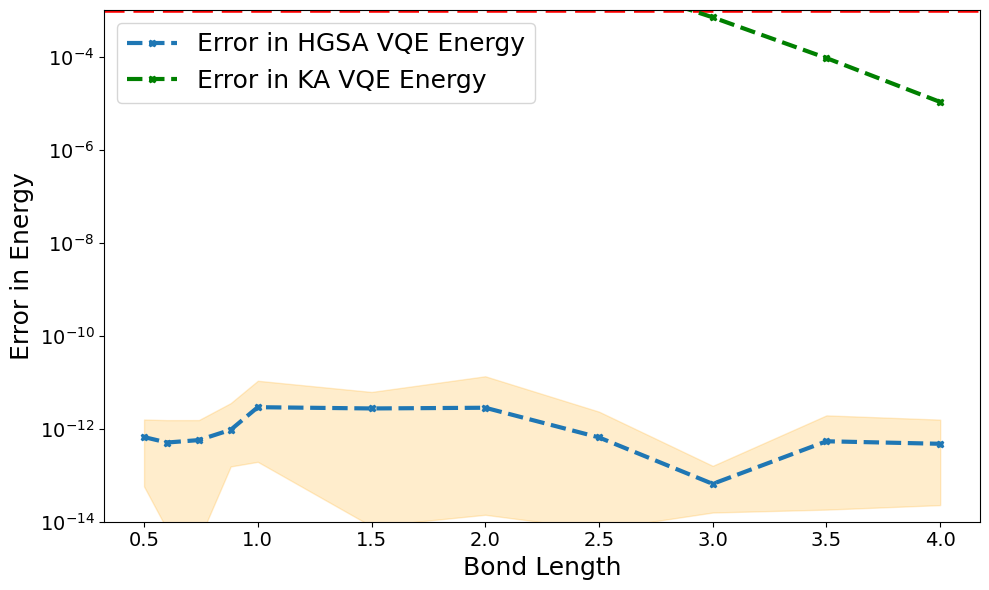

In [64]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.ylim(1e-14, 1e-3)
plt.yscale("log")
plt.axhline(y=1e-3, color='r', linestyle='--',linewidth=4)
plt.plot(bond_lengths, mean_vqe_errors, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in HGSA VQE Energy")
plt.plot(bond_lengths, mean_vqe_errors2, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in KA VQE Energy", color = 'green')

plt.fill_between(bond_lengths, vqe_errors_min, vqe_errors_max, alpha=0.2, color ='orange')
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Error in Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()